In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error


In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [3]:
train_cpy = train
test_cpy = test

In [4]:
print(train.shape)
print(test.shape)

(19237, 18)
(8245, 18)


In [5]:
train.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [6]:
# for train_cat in train_cpy:
#     print(train_cat)
#     print(train_cpy[train_cat].unique())

In [7]:
train_cpy['Engine volume'] = train_cpy['Engine volume'].astype(str)

train_cpy['Engine_volume_category'] = train_cpy['Engine volume'].str.extract('([a-zA-Z ]+)', expand=False).str.strip()

train_cpy['Engine_volume_value'] = train_cpy['Engine volume'].str[:3]

train_cpy['Engine_volume_value'] = train_cpy['Engine_volume_value'].astype(float)

train_cpy["Engine_volume_category"].fillna('Non-Turbo', inplace = True)

train_cpy.info()

train_cpy.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      19237 non-null  int64  
 1   Price                   19237 non-null  int64  
 2   Levy                    19237 non-null  object 
 3   Manufacturer            19237 non-null  object 
 4   Model                   19237 non-null  object 
 5   Prod. year              19237 non-null  int64  
 6   Category                19237 non-null  object 
 7   Leather interior        19237 non-null  object 
 8   Fuel type               19237 non-null  object 
 9   Engine volume           19237 non-null  object 
 10  Mileage                 19237 non-null  object 
 11  Cylinders               19237 non-null  float64
 12  Gear box type           19237 non-null  object 
 13  Drive wheels            19237 non-null  object 
 14  Doors                   19237 non-null

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Engine_volume_category,Engine_volume_value
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,Turbo,2.0
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,Non-Turbo,2.4
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4,Non-Turbo,2.0
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4,Non-Turbo,2.0
19236,45813273,470,753,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923 km,4.0,Automatic,Front,04-May,Left wheel,White,12,Non-Turbo,2.4


In [8]:
train_cpy = train_cpy.drop(['Engine volume'], axis = 1)

In [9]:
train_cpy.head(1)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Engine_volume_category,Engine_volume_value
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,Non-Turbo,3.5


In [10]:
for i in range(train_cpy.shape[0]):
    train_cpy.at[i, 'Mileage'] = train_cpy['Mileage'][i].split()[0]

In [11]:
train_cpy.head(3)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Engine_volume_category,Engine_volume_value
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,Non-Turbo,3.5
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,Non-Turbo,3.0
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,Non-Turbo,1.3


In [12]:
train[train['Levy'] == '-'].head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Engine_volume_category,Engine_volume_value
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,Non-Turbo,1.3
9,45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,Non-Turbo,3.5
11,45814819,8781,-,FORD,Transit,1999,Microbus,No,CNG,4,0 km,8.0,Manual,Rear,02-Mar,Left wheel,Blue,0,Non-Turbo,4.0
12,45815568,3000,-,OPEL,Vectra,1997,Goods wagon,No,CNG,1.6,350000 km,4.0,Manual,Front,04-May,Left wheel,White,4,Non-Turbo,1.6
23,45814106,7840,-,FORD,Transit,2001,Microbus,No,Diesel,2.0 Turbo,230000 km,4.0,Manual,Front,02-Mar,Left wheel,White,0,Turbo,2.0


In [13]:
train_cpy['Levy'] = train_cpy.Levy.str.replace('-', '0')
train_cpy['Levy'] = train_cpy['Levy'].astype(int)

In [14]:
train_cpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      19237 non-null  int64  
 1   Price                   19237 non-null  int64  
 2   Levy                    19237 non-null  int32  
 3   Manufacturer            19237 non-null  object 
 4   Model                   19237 non-null  object 
 5   Prod. year              19237 non-null  int64  
 6   Category                19237 non-null  object 
 7   Leather interior        19237 non-null  object 
 8   Fuel type               19237 non-null  object 
 9   Mileage                 19237 non-null  object 
 10  Cylinders               19237 non-null  float64
 11  Gear box type           19237 non-null  object 
 12  Drive wheels            19237 non-null  object 
 13  Doors                   19237 non-null  object 
 14  Wheel                   19237 non-null

In [15]:
train_cpy.Mileage = train_cpy.Mileage.astype(str).astype(int)

In [16]:
train_cpy.head(2)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Engine_volume_category,Engine_volume_value
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,Non-Turbo,3.5
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,Non-Turbo,3.0


In [17]:
(train_cpy.isna().sum() * 100 / train_cpy.shape[0]).sort_values(ascending=False)

Engine_volume_value       0.0
Fuel type                 0.0
Price                     0.0
Levy                      0.0
Manufacturer              0.0
Model                     0.0
Prod. year                0.0
Category                  0.0
Leather interior          0.0
Mileage                   0.0
Engine_volume_category    0.0
Cylinders                 0.0
Gear box type             0.0
Drive wheels              0.0
Doors                     0.0
Wheel                     0.0
Color                     0.0
Airbags                   0.0
ID                        0.0
dtype: float64

In [18]:
print(train_cpy['Price'].quantile(0.10))
print(train_cpy['Price'].quantile(0.90))

627.0
38609.0


In [19]:
train_cpy['Price'] = np.where(train_cpy['Price'] <627.0, 627.0,train_cpy['Price'])
train_cpy['Price'] = np.where(train_cpy['Price'] >38609.0, 38609.0,train_cpy['Price'])

print(train_cpy['Price'].skew())

0.6344751261141557


count    19237.000000
mean     15245.925508
std      11980.256603
min        627.000000
25%       5331.000000
50%      13172.000000
75%      22075.000000
max      38609.000000
Name: Price, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x1f789d02040>,
 'caps': [<matplotlib.lines.Line2D at 0x1f789d02700>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f789c9aca0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f789d02dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f789d0f160>],
 'means': []}

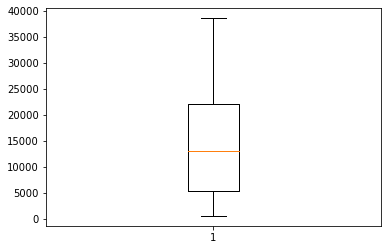

In [20]:
print(train_cpy['Price'].describe())

plt.boxplot(train_cpy["Price"])

<AxesSubplot:title={'center':'Price'}, xlabel='Engine_volume_category'>

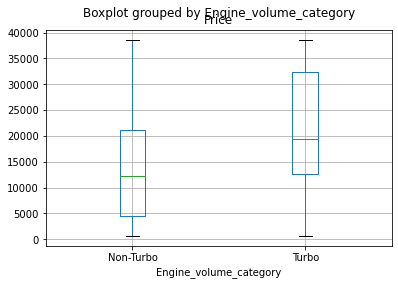

In [21]:
train_cpy.boxplot(column='Price', by='Engine_volume_category')

C:\Users\kashyap.barua\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


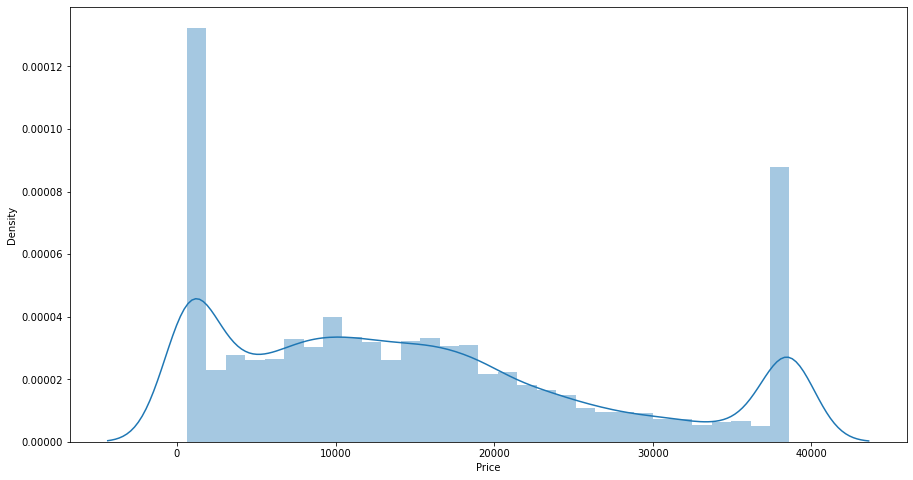

In [22]:
f, ax = plt.subplots(figsize=(15,8))
sns.distplot(train_cpy['Price'])
plt.show()

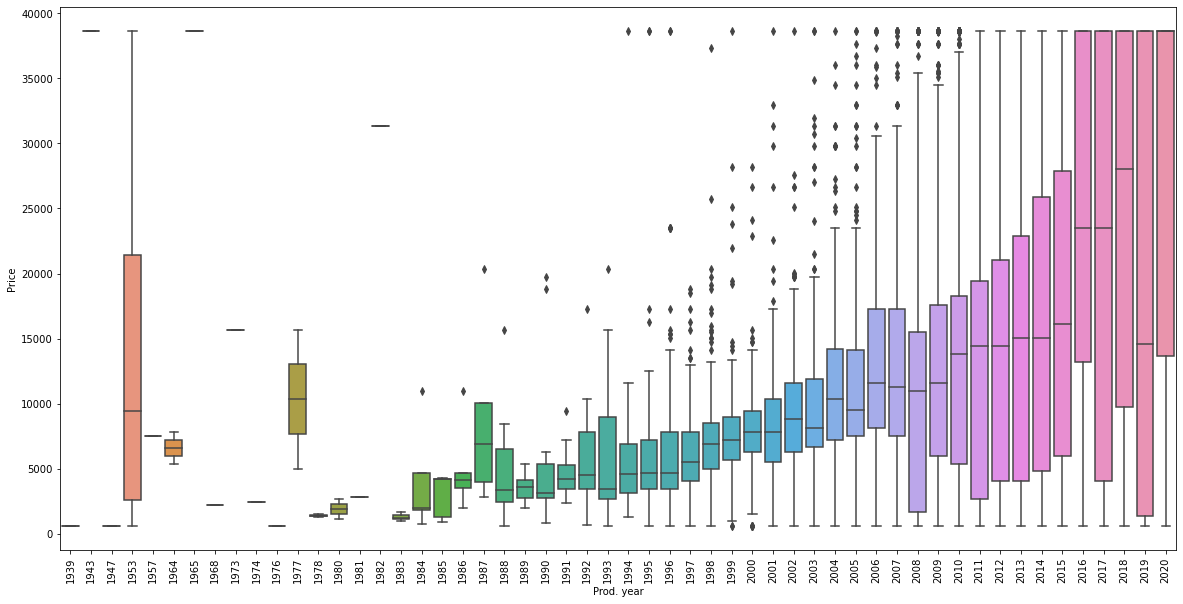

In [23]:
data = pd.concat([train_cpy['Price'], train_cpy['Prod. year']], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=train_cpy['Prod. year'], y="Price", data=data)
plt.xticks(rotation=90);

<Figure size 1440x720 with 0 Axes>

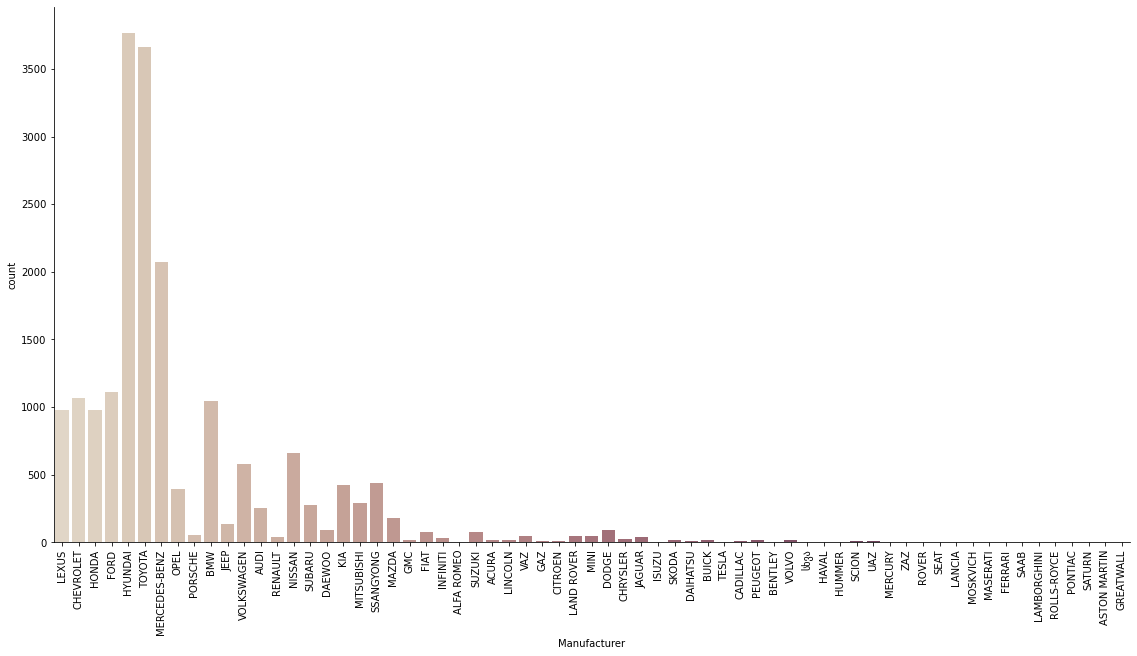

In [24]:
plt.figure(figsize=(20, 10))
sns.catplot(x="Manufacturer", kind="count", palette="ch:.25", height=8, aspect=2, data=train_cpy);
plt.xticks(rotation=90);

In [25]:
train_cat = train_cpy.select_dtypes(include='O').keys()
train_cat

Index(['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type',
       'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Engine_volume_category'],
      dtype='object')

In [26]:
var = 'Manufacturer'
train_cpy[var].value_counts()

HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
                 ... 
GREATWALL           1
HAVAL               1
PONTIAC             1
ASTON MARTIN        1
LANCIA              1
Name: Manufacturer, Length: 65, dtype: int64

In [27]:
var = 'Model'
train_cpy[var].value_counts()

Prius           1083
Sonata          1079
Camry            938
Elantra          922
E 350            542
                ... 
S 420              1
RC F F SPORT       1
Vue                1
AMG GT S           1
Colt Lancer        1
Name: Model, Length: 1590, dtype: int64

In [28]:
var = 'Category'
train_cpy[var].value_counts()

Sedan          8736
Jeep           5473
Hatchback      2847
Minivan         647
Coupe           532
Universal       364
Microbus        306
Goods wagon     233
Pickup           52
Cabriolet        36
Limousine        11
Name: Category, dtype: int64

In [29]:
var = 'Leather interior'
train_cpy[var].value_counts()

Yes    13954
No      5283
Name: Leather interior, dtype: int64

In [30]:
var = 'Fuel type'
train_cpy[var].value_counts()

Petrol            10150
Diesel             4036
Hybrid             3578
LPG                 892
CNG                 494
Plug-in Hybrid       86
Hydrogen              1
Name: Fuel type, dtype: int64

In [31]:
var = 'Gear box type'
train_cpy[var].value_counts()

Automatic    13514
Tiptronic     3102
Manual        1875
Variator       746
Name: Gear box type, dtype: int64

In [32]:
var = 'Drive wheels'
train_cpy[var].value_counts()

Front    12874
4x4       4058
Rear      2305
Name: Drive wheels, dtype: int64

In [33]:
var = 'Doors'
train_cpy[var].value_counts()

04-May    18332
02-Mar      777
>5          128
Name: Doors, dtype: int64

In [34]:
var = 'Wheel'
train_cpy[var].value_counts()

Left wheel          17753
Right-hand drive     1484
Name: Wheel, dtype: int64

In [35]:
var = 'Color'
train_cpy[var].value_counts()

Black            5033
White            4489
Silver           3792
Grey             2375
Blue             1396
Red               639
Green             322
Orange            253
Brown             187
Carnelian red     179
Golden            145
Beige             134
Sky blue          122
Yellow            106
Purple             39
Pink               26
Name: Color, dtype: int64

In [36]:
var = 'Engine_volume_category'
train_cpy[var].value_counts()

Non-Turbo    17306
Turbo         1931
Name: Engine_volume_category, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

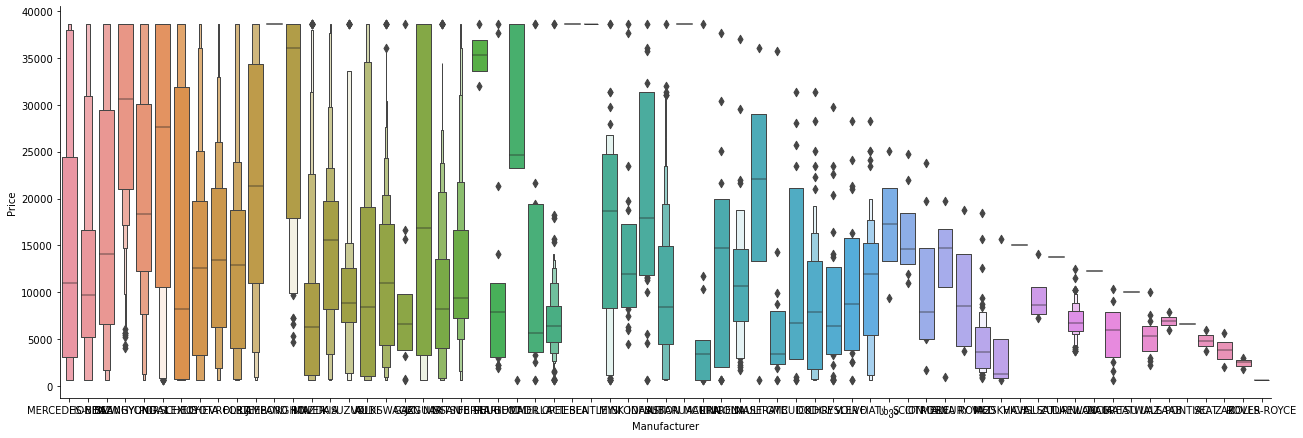

In [37]:
var = 'Manufacturer'

sns.catplot(y='Price',x=var,data= train_cpy.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [38]:
train_cpy.drop(['Manufacturer'],axis=1,inplace=True) # too much variability in the category

<function matplotlib.pyplot.show(close=None, block=None)>

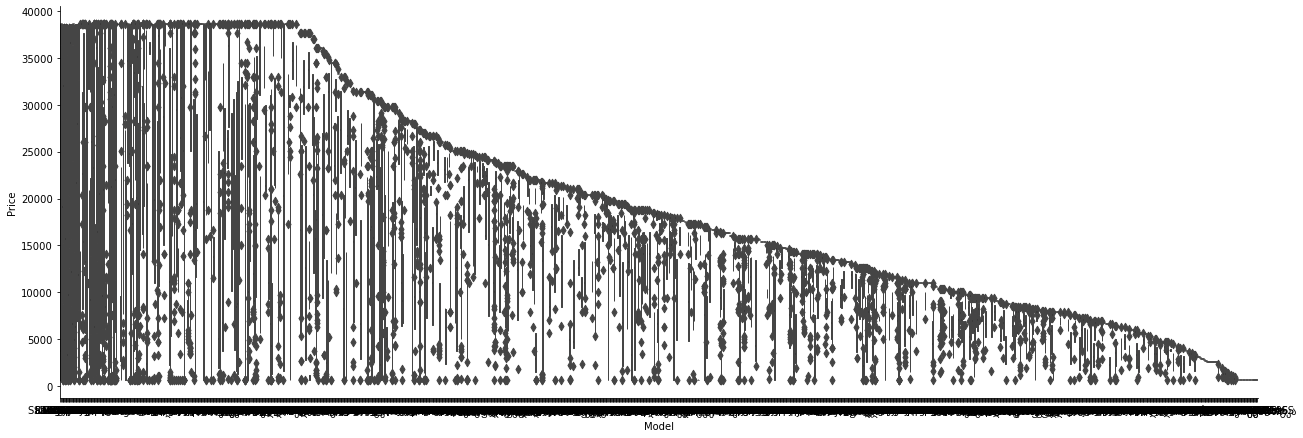

In [39]:
var = 'Model'

sns.catplot(y='Price',x=var,data= train_cpy.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [40]:
train_cpy.drop(['Model'],axis=1,inplace=True) # too much variability in the category

<function matplotlib.pyplot.show(close=None, block=None)>

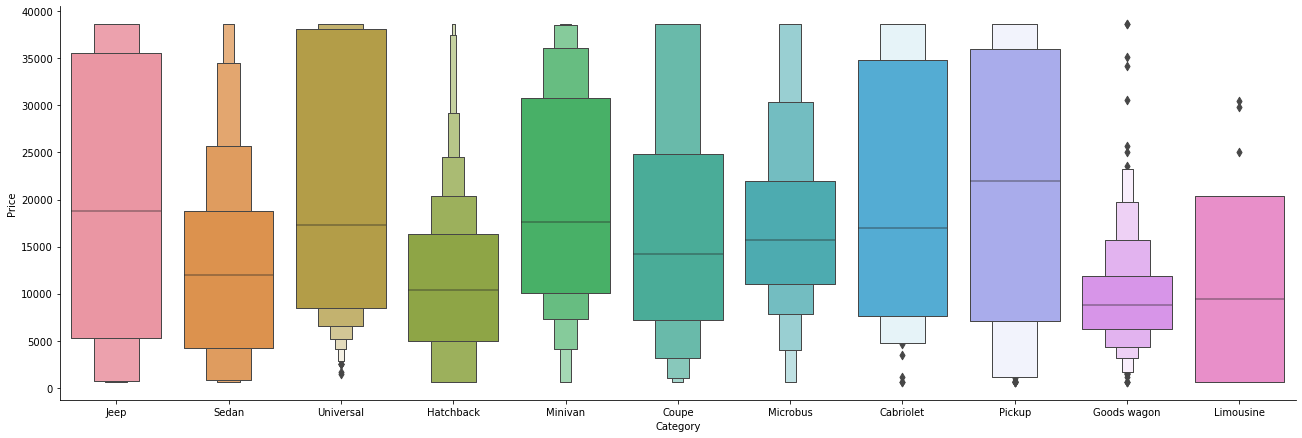

In [41]:
var = 'Category'

sns.catplot(y='Price',x=var,data= train_cpy.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [42]:
Category = train_cpy[[var]]
Category = pd.get_dummies(Category,drop_first=True)
Category.head()

,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal
0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


<function matplotlib.pyplot.show(close=None, block=None)>

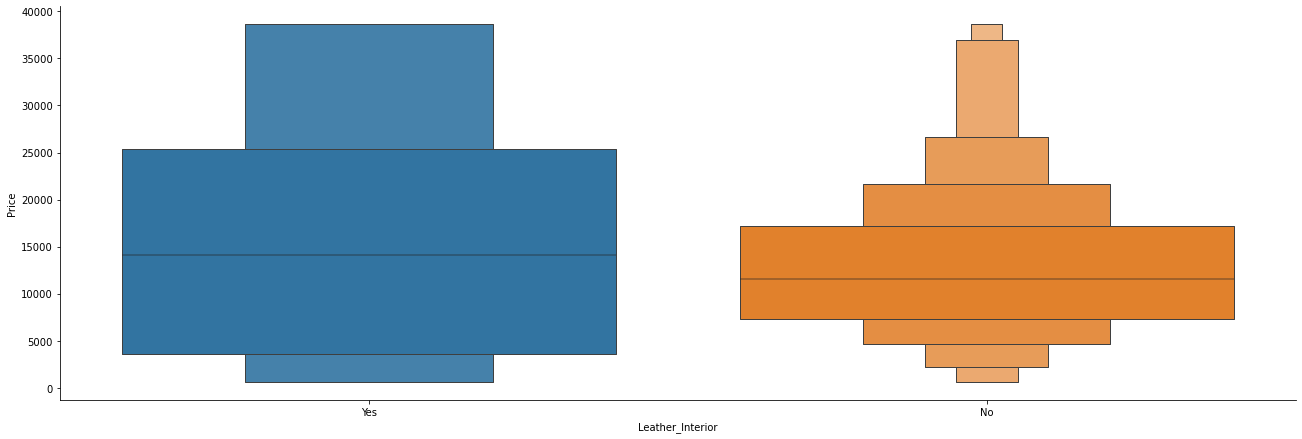

In [43]:
train_cpy = train_cpy.rename(columns={'Leather interior': 'Leather_Interior'})

var = 'Leather_Interior'

sns.catplot(y='Price',x=var,data= train_cpy.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [44]:
Leather_Interior = train_cpy[[var]]
Leather_Interior = pd.get_dummies(Leather_Interior,drop_first=True)
Leather_Interior.head()

,Leather_Interior_Yes
0,1
1,0
2,0
3,1
4,1


<function matplotlib.pyplot.show(close=None, block=None)>

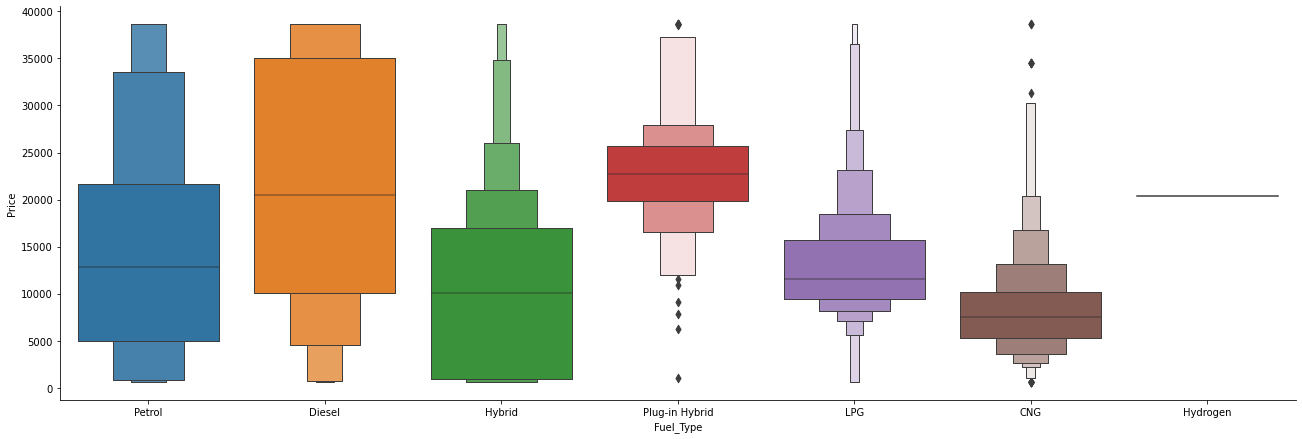

In [45]:
train_cpy = train_cpy.rename(columns={'Fuel type': 'Fuel_Type'})

var = 'Fuel_Type'

sns.catplot(y='Price',x=var,data= train_cpy.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [46]:
Fuel_Type = train_cpy[[var]]
Fuel_Type = pd.get_dummies(Fuel_Type,drop_first=True)
Fuel_Type.head()

,Fuel_Type_Diesel,Fuel_Type_Hybrid,Fuel_Type_Hydrogen,Fuel_Type_LPG,Fuel_Type_Petrol,Fuel_Type_Plug-in Hybrid
0,0,1,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,1,0,0,0,0
4,0,0,0,0,1,0


<function matplotlib.pyplot.show(close=None, block=None)>

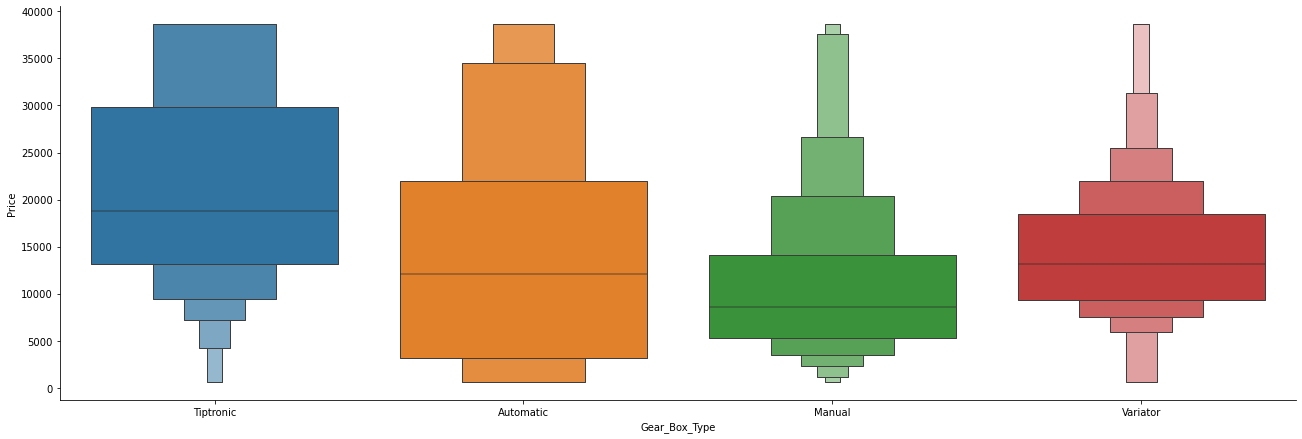

In [47]:
train_cpy = train_cpy.rename(columns={'Gear box type': 'Gear_Box_Type'})

var = 'Gear_Box_Type'

sns.catplot(y='Price',x=var,data= train_cpy.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [48]:
Gear_Box_Type = train_cpy[[var]]
Gear_Box_Type = pd.get_dummies(Gear_Box_Type,drop_first=True)
Gear_Box_Type.head()

,Gear_Box_Type_Manual,Gear_Box_Type_Tiptronic,Gear_Box_Type_Variator
0,0,0,0
1,0,1,0
2,0,0,1
3,0,0,0
4,0,0,0


<function matplotlib.pyplot.show(close=None, block=None)>

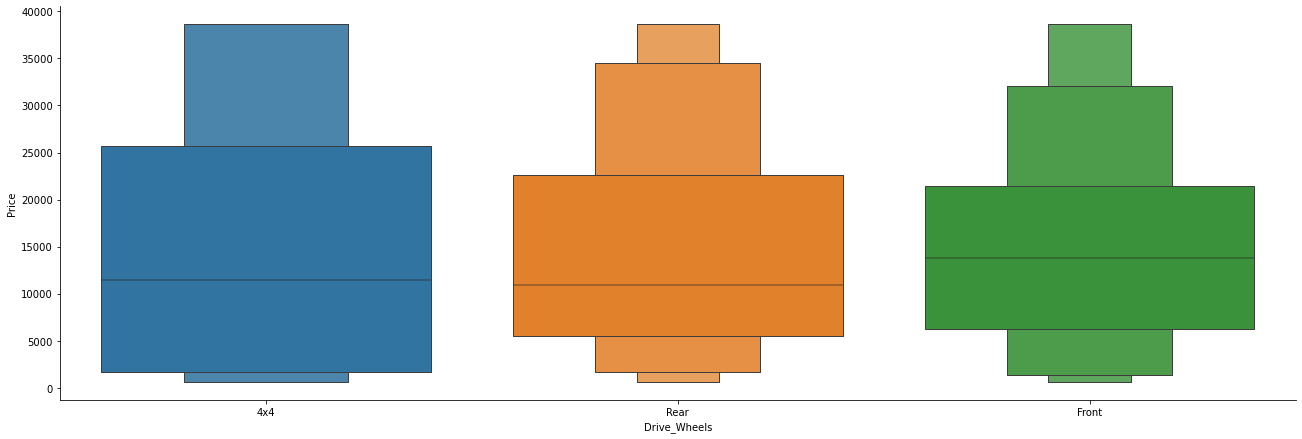

In [49]:
train_cpy = train_cpy.rename(columns={'Drive wheels': 'Drive_Wheels'})

var = 'Drive_Wheels'

sns.catplot(y='Price',x=var,data= train_cpy.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [50]:
Drive_Wheels = train_cpy[[var]]
Drive_Wheels = pd.get_dummies(Drive_Wheels,drop_first=True)
Drive_Wheels.head()

,Drive_Wheels_Front,Drive_Wheels_Rear
0,0,0
1,0,0
2,1,0
3,0,0
4,1,0


In [51]:
train_cpy['Doors'] = train_cpy['Doors'].apply(lambda x: x.replace('04-May','4'))
train_cpy['Doors'] = train_cpy['Doors'].apply(lambda x: x.replace('02-Mar','2'))

<function matplotlib.pyplot.show(close=None, block=None)>

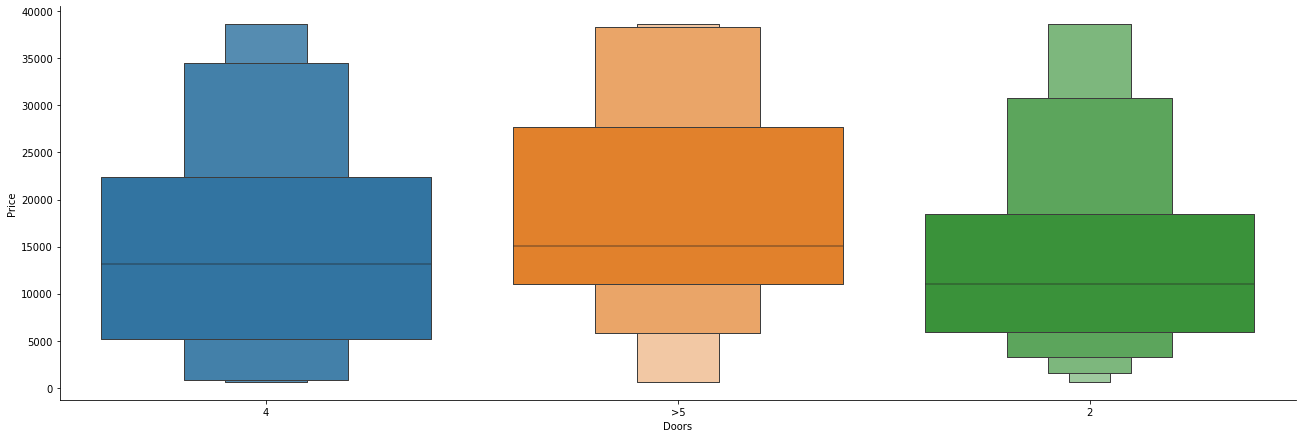

In [52]:
var = 'Doors'

sns.catplot(y='Price',x=var,data= train_cpy.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [53]:
Doors = train_cpy[[var]]
Doors = pd.get_dummies(Doors,drop_first=True)
Doors.head()

,Doors_4,Doors_>5
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


<function matplotlib.pyplot.show(close=None, block=None)>

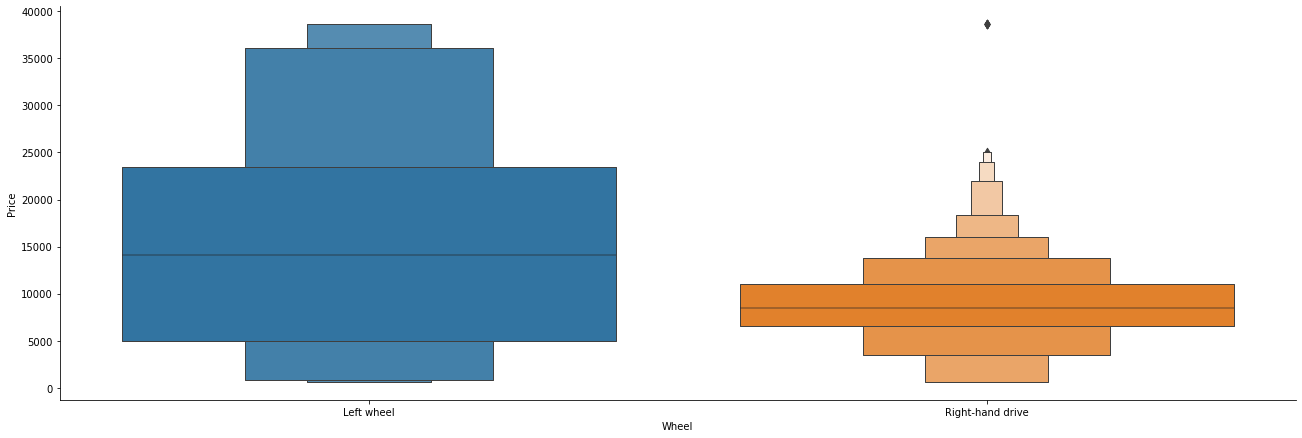

In [54]:
var = 'Wheel'

sns.catplot(y='Price',x=var,data= train_cpy.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [55]:
Wheel = train_cpy[[var]]
Wheel = pd.get_dummies(Wheel,drop_first=True)
Wheel.head()

,Wheel_Right-hand drive
0,0
1,0
2,1
3,0
4,0


<function matplotlib.pyplot.show(close=None, block=None)>

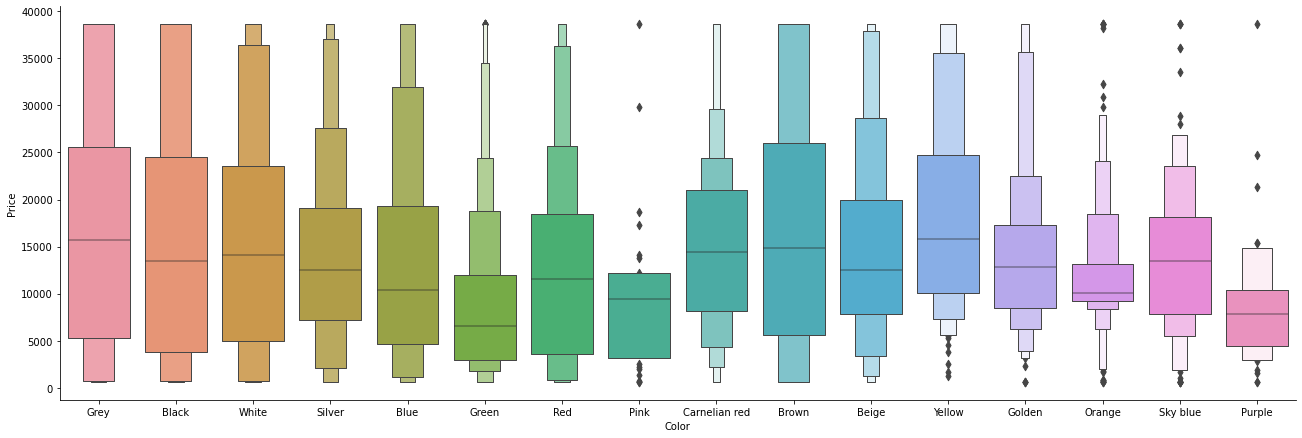

In [56]:
var = 'Color'

sns.catplot(y='Price',x=var,data= train_cpy.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [57]:
Color = train_cpy[[var]]
Color = pd.get_dummies(Color,drop_first=True)
Color.head()

,Color_Black,Color_Blue,Color_Brown,Color_Carnelian red,Color_Golden,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


<function matplotlib.pyplot.show(close=None, block=None)>

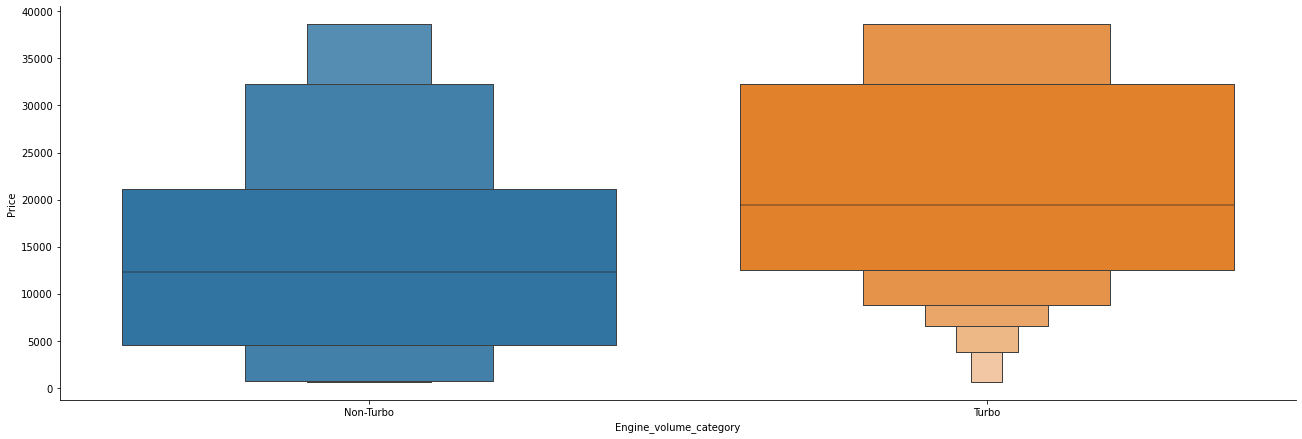

In [58]:
var = 'Engine_volume_category'

sns.catplot(y='Price',x=var,data= train_cpy.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [59]:
Engine_volume_category = train_cpy[[var]]
Engine_volume_category = pd.get_dummies(Engine_volume_category,drop_first=True)
Engine_volume_category.head()

,Engine_volume_category_Turbo
0,0
1,0
2,0
3,0
4,0


In [60]:
final_train = pd.concat([train_cpy, Category, Leather_Interior, Fuel_Type, Gear_Box_Type, Drive_Wheels,
                        Wheel, Color, Engine_volume_category],axis=1)
final_train.head()

,ID,Price,Levy,Prod. year,Category,Leather_Interior,Fuel_Type,Mileage,Cylinders,Gear_Box_Type,...,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow,Engine_volume_category_Turbo
0,45654403,13328.0,1399,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,...,0,0,0,0,0,1,0,0,0,0
1,44731507,16621.0,1018,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,...,0,0,0,0,0,0,0,0,0,0
2,45774419,8467.0,0,2006,Hatchback,No,Petrol,200000,4.0,Variator,...,0,0,0,0,0,0,0,0,0,0
3,45769185,3607.0,862,2011,Jeep,Yes,Hybrid,168966,4.0,Automatic,...,0,0,0,0,0,0,0,1,0,0
4,45809263,11726.0,446,2014,Hatchback,Yes,Petrol,91901,4.0,Automatic,...,0,0,0,0,0,1,0,0,0,0


In [61]:
final_train.drop(['Category', 'Leather_Interior', 'Fuel_Type', 'Gear_Box_Type',
                 'Drive_Wheels', 'Wheel', 'Color', 'Engine_volume_category', 'Doors'],axis=1,inplace=True)
final_train.head()

,ID,Price,Levy,Prod. year,Mileage,Cylinders,Doors,Airbags,Engine_volume_value,Category_Coupe,...,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow,Engine_volume_category_Turbo
0,45654403,13328.0,1399,2010,186005,6.0,4,12,3.5,0,...,0,0,0,0,0,1,0,0,0,0
1,44731507,16621.0,1018,2011,192000,6.0,4,8,3.0,0,...,0,0,0,0,0,0,0,0,0,0
2,45774419,8467.0,0,2006,200000,4.0,4,2,1.3,0,...,0,0,0,0,0,0,0,0,0,0
3,45769185,3607.0,862,2011,168966,4.0,4,0,2.5,0,...,0,0,0,0,0,0,0,1,0,0
4,45809263,11726.0,446,2014,91901,4.0,4,4,1.3,0,...,0,0,0,0,0,1,0,0,0,0


In [63]:
print(train_cpy.shape)
print(train_cpy.info())

(19237, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      19237 non-null  int64  
 1   Price                   19237 non-null  float64
 2   Levy                    19237 non-null  int32  
 3   Prod. year              19237 non-null  int64  
 4   Category                19237 non-null  object 
 5   Leather_Interior        19237 non-null  object 
 6   Fuel_Type               19237 non-null  object 
 7   Mileage                 19237 non-null  int32  
 8   Cylinders               19237 non-null  float64
 9   Gear_Box_Type           19237 non-null  object 
 10  Drive_Wheels            19237 non-null  object 
 11  Doors                   19237 non-null  object 
 12  Wheel                   19237 non-null  object 
 13  Color                   19237 non-null  object 
 14  Airbags                 19

In [64]:
test_cpy.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,44020629,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN
1,45784798,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN
2,45800257,-,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN
4,45814303,-,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,NaN


In [65]:
test_cpy['Levy'] = test_cpy.Levy.str.replace('-', '0')
test_cpy['Levy'] = test_cpy['Levy'].astype(int)

In [66]:
test_cpy['Engine volume'] = test_cpy['Engine volume'].astype(str)

test_cpy['Engine_volume_category'] = test_cpy['Engine volume'].str.extract('([a-zA-Z ]+)', expand=False).str.strip()

test_cpy['Engine_volume_value'] = test_cpy['Engine volume'].str[:3]

test_cpy['Engine_volume_value'] = test_cpy['Engine_volume_value'].astype(float)

test_cpy["Engine_volume_category"].fillna('Non-Turbo', inplace = True)

# test_cpy.info()

test_cpy.tail()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price,Engine_volume_category,Engine_volume_value
8240,44824410,1357,FIAT,Stilo,2004,Universal,No,Petrol,1.6,164000 km,4,Manual,Front,04-May,Left wheel,Blue,6,NaN,Non-Turbo,1.6
8241,45682346,0,BMW,528 F10,2012,Sedan,Yes,Petrol,2.8 Turbo,156000 km,4,Tiptronic,Front,04-May,Left wheel,Black,6,NaN,Turbo,2.8
8242,45649860,1646,LEXUS,GX 460,2015,Jeep,Yes,Petrol,4.6,102907 km,8,Automatic,4x4,04-May,Left wheel,Black,0,NaN,Non-Turbo,4.6
8243,45809706,784,TOYOTA,Aqua,2017,Hatchback,Yes,Petrol,1.5,3000 km,4,Automatic,Front,04-May,Left wheel,Green,4,NaN,Non-Turbo,1.5
8244,45813163,448,HONDA,Insight,2012,Hatchback,Yes,Hybrid,1.3,321269 km,4,Automatic,Front,04-May,Left wheel,Red,12,NaN,Non-Turbo,1.3


In [67]:
test_cpy = test_cpy.drop(['Engine volume'], axis = 1)

In [68]:
for i in range(test_cpy.shape[0]):
    test_cpy.at[i, 'Mileage'] = test_cpy['Mileage'][i].split()[0]
    
test_cpy.head(3)

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price,Engine_volume_category,Engine_volume_value
0,44020629,0,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,0,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN,Turbo,2.0
1,45784798,0,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,26000,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN,Non-Turbo,2.4
2,45800257,0,NISSAN,Tiida,2005,Sedan,No,Petrol,168000,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN,Non-Turbo,1.5


In [69]:
test_cpy.Mileage = test_cpy.Mileage.astype(str).astype(int)

In [70]:
(test_cpy.isna().sum() * 100 / test_cpy.shape[0]).sort_values(ascending=False)

Price                     100.0
Engine_volume_value         0.0
Mileage                     0.0
Levy                        0.0
Manufacturer                0.0
Model                       0.0
Prod. year                  0.0
Category                    0.0
Leather interior            0.0
Fuel type                   0.0
Cylinders                   0.0
Engine_volume_category      0.0
Gear box type               0.0
Drive wheels                0.0
Doors                       0.0
Wheel                       0.0
Color                       0.0
Airbags                     0.0
ID                          0.0
dtype: float64

In [71]:
test_cpy.drop(['Manufacturer'],axis=1,inplace=True)
test_cpy.drop(['Model'],axis=1,inplace=True)
test_cpy.drop(['Price'],axis=1,inplace=True)

test_cpy = test_cpy.rename(columns={'Leather interior': 'Leather_Interior'})
test_cpy = test_cpy.rename(columns={'Fuel type': 'Fuel_Type'})
test_cpy = test_cpy.rename(columns={'Gear box type': 'Gear_Box_Type'})
test_cpy = test_cpy.rename(columns={'Drive wheels': 'Drive_Wheels'})

test_cpy.head()

,ID,Levy,Prod. year,Category,Leather_Interior,Fuel_Type,Mileage,Cylinders,Gear_Box_Type,Drive_Wheels,Doors,Wheel,Color,Airbags,Engine_volume_category,Engine_volume_value
0,44020629,0,2012,Hatchback,No,Diesel,0,4,Manual,Front,02-Mar,Left wheel,Grey,10,Turbo,2.0
1,45784798,0,2012,Sedan,Yes,Petrol,26000,4,Tiptronic,Front,04-May,Left wheel,Grey,10,Non-Turbo,2.4
2,45800257,0,2005,Sedan,No,Petrol,168000,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,Non-Turbo,1.5
3,45797981,975,2012,Jeep,Yes,Petrol,143000,6,Automatic,4x4,04-May,Left wheel,Blue,12,Non-Turbo,3.2
4,45814303,0,1993,Hatchback,No,Petrol,200000,4,Manual,Front,04-May,Left wheel,Black,0,Non-Turbo,1.6


In [72]:
test_cpy['Doors'] = test_cpy['Doors'].apply(lambda x: x.replace('04-May','4'))
test_cpy['Doors'] = test_cpy['Doors'].apply(lambda x: x.replace('02-Mar','2'))

In [73]:
var = 'Category'

Category = test_cpy[[var]]
Category = pd.get_dummies(Category,drop_first=True)
Category.head()

var = 'Leather_Interior'

Leather_Interior = test_cpy[[var]]
Leather_Interior = pd.get_dummies(Leather_Interior,drop_first=True)
Leather_Interior.head()

var = 'Fuel_Type'

Fuel_Type = test_cpy[[var]]
Fuel_Type = pd.get_dummies(Fuel_Type,drop_first=True)
Fuel_Type.head()

var = 'Gear_Box_Type'

Gear_Box_Type = test_cpy[[var]]
Gear_Box_Type = pd.get_dummies(Gear_Box_Type,drop_first=True)
Gear_Box_Type.head()

var = 'Drive_Wheels'

Drive_Wheels = test_cpy[[var]]
Drive_Wheels = pd.get_dummies(Drive_Wheels,drop_first=True)
Drive_Wheels.head()

var = 'Doors'

Doors = test_cpy[[var]]
Doors = pd.get_dummies(Doors,drop_first=True)
Doors.head()

var = 'Wheel'

Wheel = test_cpy[[var]]
Wheel = pd.get_dummies(Wheel,drop_first=True)
Wheel.head()

var = 'Color'

Color = test_cpy[[var]]
Color = pd.get_dummies(Color,drop_first=True)
Color.head()

var = 'Engine_volume_category'

Engine_volume_category = test_cpy[[var]]
Engine_volume_category = pd.get_dummies(Engine_volume_category,drop_first=True)
Engine_volume_category.head()

,Engine_volume_category_Turbo
0,1
1,0
2,0
3,0
4,0


In [112]:
final_test = pd.concat([test_cpy, Category, Leather_Interior, Fuel_Type, Gear_Box_Type, Drive_Wheels,
                        Wheel, Color, Engine_volume_category],axis=1)
final_test.head()

,ID,Levy,Prod. year,Category,Leather_Interior,Fuel_Type,Mileage,Cylinders,Gear_Box_Type,Drive_Wheels,...,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow,Engine_volume_category_Turbo
0,44020629,0,2012,Hatchback,No,Diesel,0,4,Manual,Front,...,1,0,0,0,0,0,0,0,0,1
1,45784798,0,2012,Sedan,Yes,Petrol,26000,4,Tiptronic,Front,...,1,0,0,0,0,0,0,0,0,0
2,45800257,0,2005,Sedan,No,Petrol,168000,4,Automatic,Front,...,0,0,0,0,0,0,1,0,0,0
3,45797981,975,2012,Jeep,Yes,Petrol,143000,6,Automatic,4x4,...,0,0,0,0,0,0,0,0,0,0
4,45814303,0,1993,Hatchback,No,Petrol,200000,4,Manual,Front,...,0,0,0,0,0,0,0,0,0,0


In [75]:
final_test.columns

Index(['ID', 'Levy', 'Prod. year', 'Category', 'Leather_Interior', 'Fuel_Type',
       'Mileage', 'Cylinders', 'Gear_Box_Type', 'Drive_Wheels', 'Doors',
       'Wheel', 'Color', 'Airbags', 'Engine_volume_category',
       'Engine_volume_value', 'Category_Coupe', 'Category_Goods wagon',
       'Category_Hatchback', 'Category_Jeep', 'Category_Limousine',
       'Category_Microbus', 'Category_Minivan', 'Category_Pickup',
       'Category_Sedan', 'Category_Universal', 'Leather_Interior_Yes',
       'Fuel_Type_Diesel', 'Fuel_Type_Hybrid', 'Fuel_Type_Hydrogen',
       'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Fuel_Type_Plug-in Hybrid',
       'Gear_Box_Type_Manual', 'Gear_Box_Type_Tiptronic',
       'Gear_Box_Type_Variator', 'Drive_Wheels_Front', 'Drive_Wheels_Rear',
       'Wheel_Right-hand drive', 'Color_Black', 'Color_Blue', 'Color_Brown',
       'Color_Carnelian red', 'Color_Golden', 'Color_Green', 'Color_Grey',
       'Color_Orange', 'Color_Pink', 'Color_Purple', 'Color_Red',
       'Color_

In [155]:
final_test.drop(['Category', 'Leather_Interior', 'Fuel_Type', 'Gear_Box_Type',
                 'Drive_Wheels', 'Wheel', 'Color', 'Doors', 'Engine_volume_category'],axis=1,inplace=True)
final_test.head()

KeyError: "['Category' 'Leather_Interior' 'Fuel_Type' 'Gear_Box_Type' 'Drive_Wheels'\n 'Wheel' 'Color' 'Doors' 'Engine_volume_category'] not found in axis"

In [78]:
final_train = final_train.iloc[:,1:]

In [113]:
final_test = final_test.iloc[:,1:]

In [116]:
print(final_train.shape)
print(final_test.shape)

(19237, 46)
(8245, 45)


In [85]:
final_train.columns

Index(['Price', 'Levy', 'Prod. year', 'Mileage', 'Cylinders', 'Airbags',
       'Engine_volume_value', 'Category_Coupe', 'Category_Goods wagon',
       'Category_Hatchback', 'Category_Jeep', 'Category_Limousine',
       'Category_Microbus', 'Category_Minivan', 'Category_Pickup',
       'Category_Sedan', 'Category_Universal', 'Leather_Interior_Yes',
       'Fuel_Type_Diesel', 'Fuel_Type_Hybrid', 'Fuel_Type_Hydrogen',
       'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Fuel_Type_Plug-in Hybrid',
       'Gear_Box_Type_Manual', 'Gear_Box_Type_Tiptronic',
       'Gear_Box_Type_Variator', 'Drive_Wheels_Front', 'Drive_Wheels_Rear',
       'Wheel_Right-hand drive', 'Color_Black', 'Color_Blue', 'Color_Brown',
       'Color_Carnelian red', 'Color_Golden', 'Color_Green', 'Color_Grey',
       'Color_Orange', 'Color_Pink', 'Color_Purple', 'Color_Red',
       'Color_Silver', 'Color_Sky blue', 'Color_White', 'Color_Yellow',
       'Engine_volume_category_Turbo'],
      dtype='object')

In [86]:
final_test.columns

Index(['Levy', 'Prod. year', 'Mileage', 'Cylinders', 'Airbags',
       'Engine_volume_value', 'Category_Coupe', 'Category_Goods wagon',
       'Category_Hatchback', 'Category_Jeep', 'Category_Limousine',
       'Category_Microbus', 'Category_Minivan', 'Category_Pickup',
       'Category_Sedan', 'Category_Universal', 'Leather_Interior_Yes',
       'Fuel_Type_Diesel', 'Fuel_Type_Hybrid', 'Fuel_Type_Hydrogen',
       'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Fuel_Type_Plug-in Hybrid',
       'Gear_Box_Type_Manual', 'Gear_Box_Type_Tiptronic',
       'Gear_Box_Type_Variator', 'Drive_Wheels_Front', 'Drive_Wheels_Rear',
       'Wheel_Right-hand drive', 'Color_Black', 'Color_Blue', 'Color_Brown',
       'Color_Carnelian red', 'Color_Golden', 'Color_Green', 'Color_Grey',
       'Color_Orange', 'Color_Pink', 'Color_Purple', 'Color_Red',
       'Color_Silver', 'Color_Sky blue', 'Color_White', 'Color_Yellow',
       'Engine_volume_category_Turbo'],
      dtype='object')

In [87]:
X = final_train.loc[:,['Levy', 'Prod. year', 'Mileage', 'Cylinders',
       'Airbags', 'Engine_volume_value', 'Category_Coupe',
       'Category_Goods wagon', 'Category_Hatchback', 'Category_Jeep',
       'Category_Limousine', 'Category_Microbus', 'Category_Minivan',
       'Category_Pickup', 'Category_Sedan', 'Category_Universal',
       'Leather_Interior_Yes', 'Fuel_Type_Diesel', 'Fuel_Type_Hybrid',
       'Fuel_Type_Hydrogen', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Fuel_Type_Plug-in Hybrid', 'Gear_Box_Type_Manual',
       'Gear_Box_Type_Tiptronic', 'Gear_Box_Type_Variator',
       'Drive_Wheels_Front', 'Drive_Wheels_Rear', 'Wheel_Right-hand drive',
       'Color_Black', 'Color_Blue', 'Color_Brown', 'Color_Carnelian red',
       'Color_Golden', 'Color_Green', 'Color_Grey', 'Color_Orange',
       'Color_Pink', 'Color_Purple', 'Color_Red', 'Color_Silver',
       'Color_Sky blue', 'Color_White', 'Color_Yellow',
       'Engine_volume_category_Turbo']]

y = final_train.loc[:,['Price']]

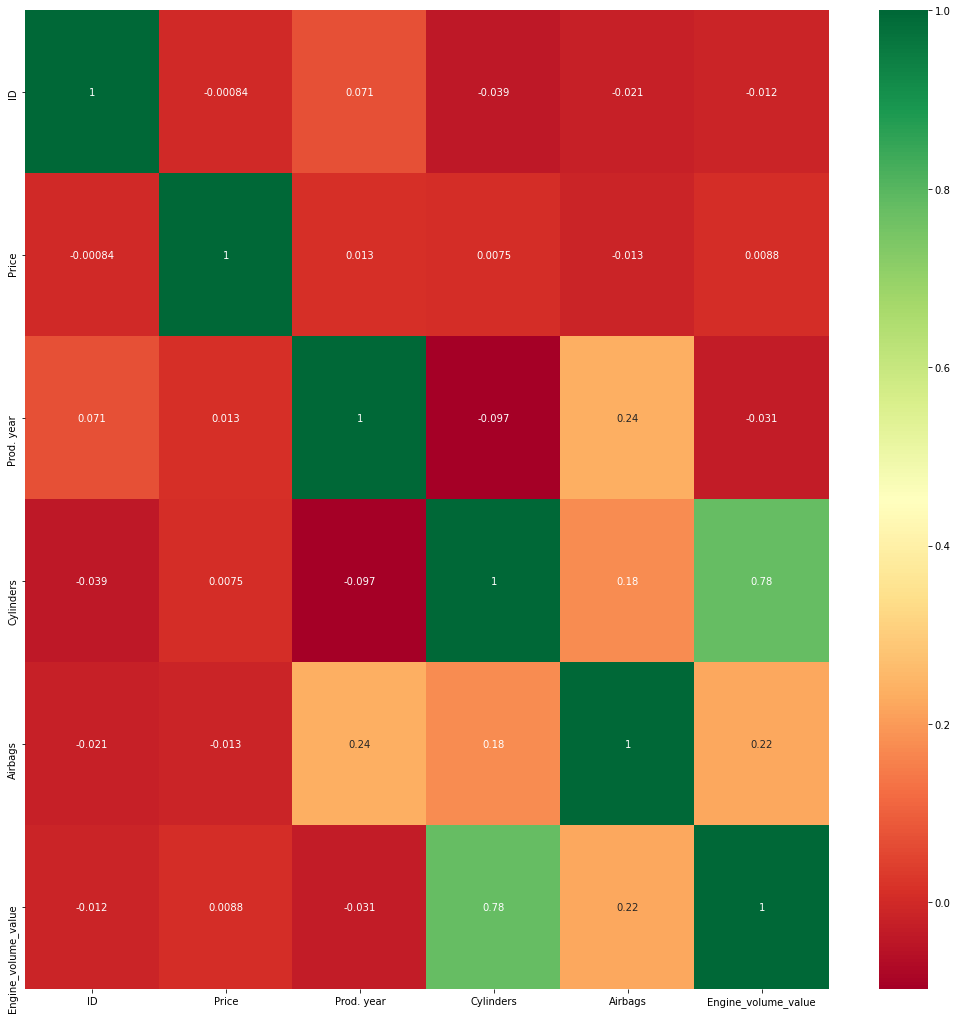

In [565]:
plt.figure(figsize=(18,18))
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn')

plt.show()

In [88]:
from sklearn.ensemble import ExtraTreesRegressor
selection= ExtraTreesRegressor()
selection.fit(X,y)

<ipython-input-88-914d803b91a8>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  selection.fit(X,y)


ExtraTreesRegressor()

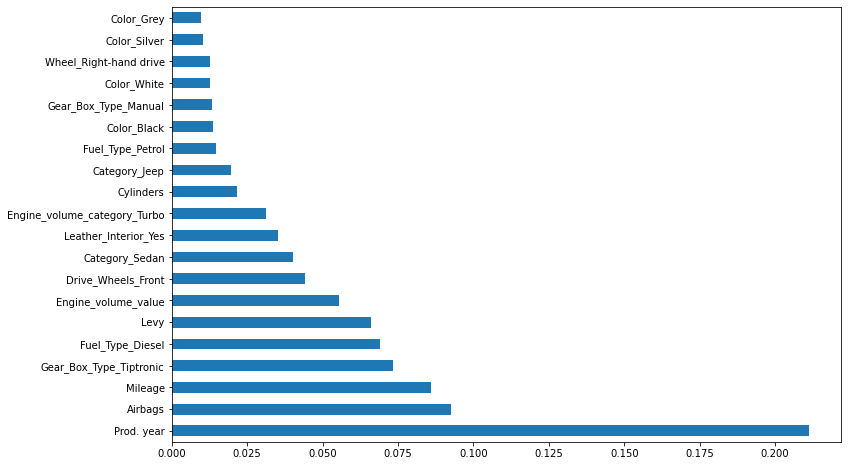

In [89]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [152]:
X = final_train#.loc[:,['Prod. year', 'Airbags', 'Mileage', 'Gear_Box_Type_Tiptronic',
                #      'Fuel_Type_Diesel', 'Levy', 'Engine_volume_value', 'Drive_Wheels_Front',
                 #     'Category_Sedan', 'Leather_Interior_Yes', 'Engine_volume_category_Turbo',
                  #    'Cylinders', 'Category_Jeep', 'Gear_Box_Type_Manual', 'Wheel_Right-hand drive',
                   #   'Color_Black', 'Fuel_Type_Petrol', 'Color_White', 'Color_Silver', 'Color_Grey']]

y = final_train.loc[:,['Price']]

In [156]:
X.drop(['Price'],axis=1,inplace=True)

In [157]:
X.shape

(19237, 45)

In [158]:
final_test = final_test#.loc[:,['Prod. year', 'Airbags', 'Mileage', 'Gear_Box_Type_Tiptronic',
                   #   'Fuel_Type_Diesel', 'Levy', 'Engine_volume_value', 'Drive_Wheels_Front',
                   #   'Category_Sedan', 'Leather_Interior_Yes', 'Engine_volume_category_Turbo',
                    #  'Cylinders', 'Category_Jeep', 'Gear_Box_Type_Manual', 'Wheel_Right-hand drive',
                     # 'Color_Black', 'Fuel_Type_Petrol', 'Color_White', 'Color_Silver', 'Color_Grey']]

In [159]:
final_test.shape

(8245, 45)

In [160]:
final_test.columns

Index(['Levy', 'Prod. year', 'Mileage', 'Cylinders', 'Airbags',
       'Engine_volume_value', 'Category_Coupe', 'Category_Goods wagon',
       'Category_Hatchback', 'Category_Jeep', 'Category_Limousine',
       'Category_Microbus', 'Category_Minivan', 'Category_Pickup',
       'Category_Sedan', 'Category_Universal', 'Leather_Interior_Yes',
       'Fuel_Type_Diesel', 'Fuel_Type_Hybrid', 'Fuel_Type_Hydrogen',
       'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Fuel_Type_Plug-in Hybrid',
       'Gear_Box_Type_Manual', 'Gear_Box_Type_Tiptronic',
       'Gear_Box_Type_Variator', 'Drive_Wheels_Front', 'Drive_Wheels_Rear',
       'Wheel_Right-hand drive', 'Color_Black', 'Color_Blue', 'Color_Brown',
       'Color_Carnelian red', 'Color_Golden', 'Color_Green', 'Color_Grey',
       'Color_Orange', 'Color_Pink', 'Color_Purple', 'Color_Red',
       'Color_Silver', 'Color_Sky blue', 'Color_White', 'Color_Yellow',
       'Engine_volume_category_Turbo'],
      dtype='object')

In [162]:
X.columns

Index(['Levy', 'Prod. year', 'Mileage', 'Cylinders', 'Airbags',
       'Engine_volume_value', 'Category_Coupe', 'Category_Goods wagon',
       'Category_Hatchback', 'Category_Jeep', 'Category_Limousine',
       'Category_Microbus', 'Category_Minivan', 'Category_Pickup',
       'Category_Sedan', 'Category_Universal', 'Leather_Interior_Yes',
       'Fuel_Type_Diesel', 'Fuel_Type_Hybrid', 'Fuel_Type_Hydrogen',
       'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Fuel_Type_Plug-in Hybrid',
       'Gear_Box_Type_Manual', 'Gear_Box_Type_Tiptronic',
       'Gear_Box_Type_Variator', 'Drive_Wheels_Front', 'Drive_Wheels_Rear',
       'Wheel_Right-hand drive', 'Color_Black', 'Color_Blue', 'Color_Brown',
       'Color_Carnelian red', 'Color_Golden', 'Color_Green', 'Color_Grey',
       'Color_Orange', 'Color_Pink', 'Color_Purple', 'Color_Red',
       'Color_Silver', 'Color_Sky blue', 'Color_White', 'Color_Yellow',
       'Engine_volume_category_Turbo'],
      dtype='object')

In [163]:
# Split the dataset to train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

In [164]:
# Linear Regression
from sklearn.linear_model import LinearRegression

lm_model = LinearRegression(normalize=True)

lm_model.fit(X_train, y_train)

predictions = lm_model.predict(X_test)

In [165]:
print("Accuracy on Training set: ",lm_model.score(X_train,y_train))
print("Accuracy on Testing set: ",lm_model.score(X_test,y_test))

Accuracy on Training set:  0.35271124826598754
Accuracy on Testing set:  0.35159074337691953


In [166]:
# Random Forest Model

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)

random_forest = rf.fit(X_train, y_train)

prediction_forest = random_forest.predict(X_test)

# acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

<ipython-input-166-139a8b875978>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest = rf.fit(X_train, y_train)


In [167]:
print("Accuracy on Training set: ",rf.score(X_train,y_train))
print("Accuracy on Testing set: ",rf.score(X_test,y_test))

Accuracy on Training set:  0.9832900111399926
Accuracy on Testing set:  0.33194733194733195


In [100]:
# pip install xgboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\kashyap.barua\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [168]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
xg_boost = xgb.fit(X_train, y_train, verbose=False)

prediction_xgb = xg_boost.predict(X_test)

In [169]:
print("Accuracy on Training set: ",xgb.score(X_train,y_train))
print("Accuracy on Testing set: ",xgb.score(X_test,y_test))

Accuracy on Training set:  0.8806388210379984
Accuracy on Testing set:  0.75478792091739


In [170]:
np.sqrt(mean_squared_log_error(y_test, predictions)) #Linear Regression

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

In [171]:
np.sqrt(mean_squared_log_error(y_test, prediction_forest)) #Random Forest

0.9887135656217975

In [172]:
np.sqrt(mean_squared_log_error(y_test, prediction_xgb)) #XGBoost

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

# Submission

In [195]:
# test_cpy = test

# test_cat = ['Cylinders', 'Airbags', 'Manufacturer', 'Model', 'Category', 'Leather interior',
#               'Fuel type', 'Gear box type', 'Color']

# for col in test_cat:
#     test_cpy[col] = pd.factorize(test_cpy[col])[0] + 1

In [577]:
# test_feature = test_cpy[['Cylinders', 'Airbags', 'Manufacturer', 'Model', 'Category', 'Leather interior',
#               'Fuel type', 'Gear box type', 'Color']]

# test_feature.head()

In [173]:
test_predictions = random_forest.predict(final_test)

test_predictions

array([17876., 21012.,  7700., ...,   706., 38609.,   627.])

In [174]:
test_predictions_xgb = xg_boost.predict(final_test)

test_predictions_xgb

array([19402.012 , 17838.018 ,  7517.019 , ...,  1713.9005, 37034.03  ,
        2338.8467], dtype=float32)

In [175]:
output = pd.DataFrame({'Price' : test_predictions_xgb})

output

,Price
0,19402.011719
1,17838.017578
2,7517.019043
3,5074.085938
4,6247.926758
...,...
8240,8102.836426
8241,25658.283203
8242,1713.900513
8243,37034.031250


In [176]:
output.to_csv('./my_submission_file.csv', index=False)